# 지도학습 회귀 미리보기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 농어의 무게를 예측해보자.

### 농어 무게 예측하기
- k-최근접이웃 회귀모델을 통해 길이값으로 무게를 예측

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier # 분류 모델

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [27]:
# 데이터 준비
# - 입력: 길이
# - 라벨(정답): 무게
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape

((56,), (56,))

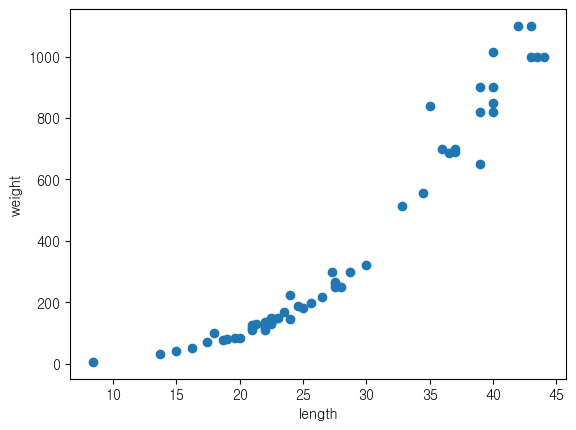

In [28]:
# -> ndarray 형태의 데이터 2개
# 데이터 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
# 데이터 파악 및 경향
# lenght가 올라갈 수록 weight 도 올라간다.

In [ ]:
# 회귀모델을 통해 길이값으로 무게를 예측
# -> 입력 데이터를 length -> 예측 데이터를 weight
# 모델 생성
# 1. 모델 생성
# 2. 모델 훈련
# 3. 모델 예측
# 4. 모델 평가
# 5. 모델 저장

In [29]:
# 훈련/테스트 데이터 분리
from sklearn.model_selection import train_test_split

In [30]:
# train_input, test_input, train_label, test_label = train_test_split(perch_lenght, perch_weight, random_state=42)
# 훈련입력, 테스트입력, 훈련결과, 테스트결과 = train_test_split(입력데이터, 결과데이터, random_state=42,)

In [31]:
train_input, test_input, train_label, test_label = train_test_split(perch_length, perch_weight, random_state=42)

train_input.shape, test_input.shape, train_label.shape, test_label.shape

((42,), (14,), (42,), (14,))

In [6]:
42/56 # 자동적으로 훈련은 75% 테스트는 25%로 분리된다.

0.75

In [ ]:
# 모델의 데이터는 ndarray로 제공하는 것이 좋다 = 2차원으로 만들어보자.

In [32]:
train_input.shape, test_input.shape

((42,), (14,))

In [33]:
# 배치차원 추가 -> 2차원
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_input.shape, test_input.shape

((42, 1), (14, 1))

In [8]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

##### 훈련

In [ ]:
# 훈련을 하기 위해서 모델을 생성하자.

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
knr = KNeighborsRegressor()

knr.fit(train_input, train_label) # 지도 학습

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


##### 평가 - 결정계수 $R^2$

$$
    결정계수 = 1 - \frac{(실제값-예측)^2의 합}{(실제값-평균)^2의 합}
$$
- 0 ~ 1 사이의 값을 반환하고, 1에 가까울수록 정확하다는 뜻

실제값과 예측값이 같다면 분자는 0이 되므로 결정계수는 1이 된다.
실제값과 예측값이 작은 차이가 난다면, 분자는 작아지고 분모는 변화가 없으므로 결정계수는 1에 가까워진다.

In [36]:
knr.score(test_input, test_label)

0.992809406101064

##### Predict 예측

In [37]:
pred = knr.predict([[30]])
pred

array([311.4])

In [38]:
distances, index = knr.kneighbors([[30]])
distances, index

(array([[1.3, 2.5, 2.5, 2.8, 3.5]]), array([[28, 13, 18, 20, 21]]))

In [39]:
train_label[index]

array([[300., 260., 265., 514., 218.]])

In [ ]:
# 최근접 이웃의 평균값을 예측값으로 사용

In [40]:
# 최근접 이웃 5개 무게 값의 평균치
train_label[index].mean()

np.float64(311.4)

In [ ]:
최근접 이웃 모델 작동 방식
 - 분류: 최근접 이웃 클래스 찾기
 - 회귀: 최근접 이웃 평균값 찾기, 가까운 이웃(5) 평균치를 내서 반환
 from sklearn.neighbors import KNeighborsRegressor

##### 최근접 이웃 모델의 한계
1. 용량이 큰 데이터를 메모리에 로드할 때의 문제
2. 메모리에 로드된 데이터포인트만 대상으로 예측하므로 한게점에서 취약약

In [ ]:
knr.predict([[50], [100]]) # 결과값이 너무 커서 예측이 불가능
# 왜 50, 100 예측 결과가 동일한 값을 갖는가?
# 최근접 이웃 모델은 가까운 이웃(5) 평균치를 내서 반환하기 때문에 예측 결과가 동일한 값을 갖는다.

# 그래서 이러한 문제점을 파악하기 위해서 '선형회귀 모델'을 사용한다.
# 그렇다고 이 문제를 해결하기 위해서 '선형회귀 모델'이 나온 것이 아니다.

array([1010., 1010.])

In [ ]:
# 데이터 최대점, 최저점 안에서만 예측이 가능하다.
# 한계점을 넘어서는 데이터를 넣어주면 예측이 불가능, -> 취약점점

##### 선형회귀 모델

**컬럼이 하나인 경우**

$y = wx + b$

1. 회귀계수 (= 기울기, 가중치, weight, coefficient)
2. 절편 (= 편향, bias, intercept)

In [ ]:
# 컬럼이 하나인 경우 = Feature가 하나인 경우
# 예측을 위해서 x 에 값을 입력값으로 넣고, y값으로 돌려준다.
# 기울기=가중치=weight,=coefficient
# weight는 기울기를 의미한다.
# 철판, 바이오스..

In [ ]:
# w(회귀계수), b(절편) 를 학습해서 예측을 수행하는 것

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()
lr.fit(train_input, train_label)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
# 학습이 마무리 되면, weight와 bias가 생성된다.
# weight, bias는 모델이 학습하면서 생성되는 값이다.

In [45]:
# 회귀계수, 절편
lr.coef_, lr.intercept_ # y = Wx + b
# y = 39.01714796 * x + 709.018449535474

(array([39.01714496]), np.float64(-709.0186449535474))

In [46]:
# 예측값 직접 계산
w = lr.coef_
b = lr.intercept_
x = np.array([50, 100])

y = w * x + b
print(y)

[1241.83860323 3192.69585141]


In [47]:
# 모델을 통한 예측

lr.predict([[50], [100]])


array([1241.83860323, 3192.69585141])

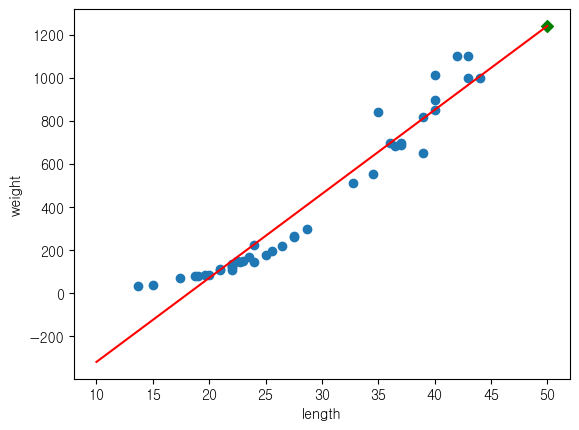

In [48]:
# 시각화
plt.scatter(train_input, train_label)
plt.plot([10, 50], [w*10+b, w*50+b], color='r')
plt.scatter(50, w*50+b, color='g', marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [49]:
lr.score(test_input, test_label)

0.824750312331356

**컬럼이 여러 개인 경우**

$ y = w_1x_1 + w_2x_2 + w_3x_3 + ... + b $

1. 회귀 계수 여러 개
2. 절편 한 개

In [ ]:
x 값에 대해서 각각의 w 가중치
즉, 컬럼이 여러개 = 특성이 여러개

In [ ]:
# 데이터 로드

In [50]:
perch_df = pd.read_csv('./data/perch_full.csv')
perch_df.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [51]:
perch_df.describe()

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [52]:
perch_df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [53]:
# 입력 데이터
perch_full = perch_df.to_numpy() # 데이터 프레임을 넘파이 배열로 변환
perch_full.shape

(56, 3)

In [54]:
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [55]:
perch_weight.shape

(56,)

In [56]:
# 라벨 데이터
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [57]:
len(perch_weight)

56

In [58]:
# 훈련/테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(perch_full, perch_weight, random_state=42)
train_input.shape, test_input.shape, train_label.shape, test_label.shape

((42, 3), (14, 3), (42,), (14,))

In [59]:
# 훈련 (모델 생성/학습/예측)

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_label)
# 학습이 마무리 되면, weight와 bias가 생성된다.
# weight, bias는 모델이 학습하면서 생성되는 값이다.

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
# 가중치, 절편 -> 직접 계산
lr.coef_, lr.intercept_

(array([ 9.07538153, 69.46401443, 38.00385678]),
 np.float64(-599.1708082981097))

In [62]:
lr.coef_ # 특징이 3개이므로 3개의 가중치가 생성된다.

array([ 9.07538153, 69.46401443, 38.00385678])

In [63]:
lr.intercept_ # 절편

np.float64(-599.1708082981097)

In [64]:
# 예측값 직접 계산
w1, w2, w3 = lr.coef_
b = lr.intercept_
x1, x2, x3 = 20.0, 5.08, 2.77

y = w1*x1 + w2*x2 + w3*x3 + b
print(y)

40.484698833552216


In [65]:
w

array([39.01714496])

In [66]:
w.shape

(1,)

In [67]:
b

np.float64(-599.1708082981097)

In [68]:
b.shape

()

In [77]:
# b 브로드캐스팅
b = b.reshape(1, 3)

ValueError: cannot reshape array of size 1 into shape (1,3)

In [69]:
b = b.reshape(-1, 1)
b.shape
w.shape
w1 = w[0]
w2 = w[1]
w3 = w[2]
w1, w2, w3

IndexError: index 1 is out of bounds for axis 0 with size 1

In [70]:
y = w1*x1 + w2*x2 + w3*x3 + b

In [71]:
# 예측값 직접 계산
w1, w2, w3 = lr.coef_
b = lr.intercept_
x1, x2, x3 = 20.0, 5.08, 2.77

y = w1*x1 + w2*x2 + w3*x3 + b
print(y)

40.484698833552216


In [72]:
# 예측
lr.predict([[20.0, 5.08, 2.77]])

array([40.48469883])

In [73]:
# 평가
lr.score(test_input, test_label)

0.8796419177546367

In [74]:
# 평가
lr.score(train_input, train_label)

0.9559326821885706

In [ ]:
# 평가 지표를 train 지표 데이터와 test 지표 데이터를 비교해보고, 너무 많이 차이난다면 '과적합' 또는 '과소적합' 문제가 있다고 판단할 수 있다.

In [ ]:
# 선형 회귀 모델은 특성이 많을수록 예측 성능이 좋아진다.
# 특성이 많아지면 가중치가 많아지고, 가중치가 많아지면 예측 성능이 좋아진다.
# 그렇다고 모든 데이터가 예측된 선형에 맞게 예측되는 것은 아니다.
# 그래서 모델을 평가할 때는 훈련 데이터와 테스트 데이터를 비교해서 평가한다.

In [89]:
# 평가
lr.predict(test_input)

array([-322.78309496,   52.96101903,  329.77783424,  171.46884473,
        149.65836217,  789.639144  ,  383.68482432,  250.05247716,
        813.2470793 ,  126.13660027,  980.20626415,  -33.35965799,
        357.76466578,  421.8675313 ])

In [86]:
lr.predict(test_input).mean()

np.float64(319.30870667848416)

In [75]:
import matplotlib.font_manager as fm
import matplotlib

In [76]:
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

직접 계산한 값: 40.484698833552216
모델 예측값: 40.484698833552216
차이: 0.0


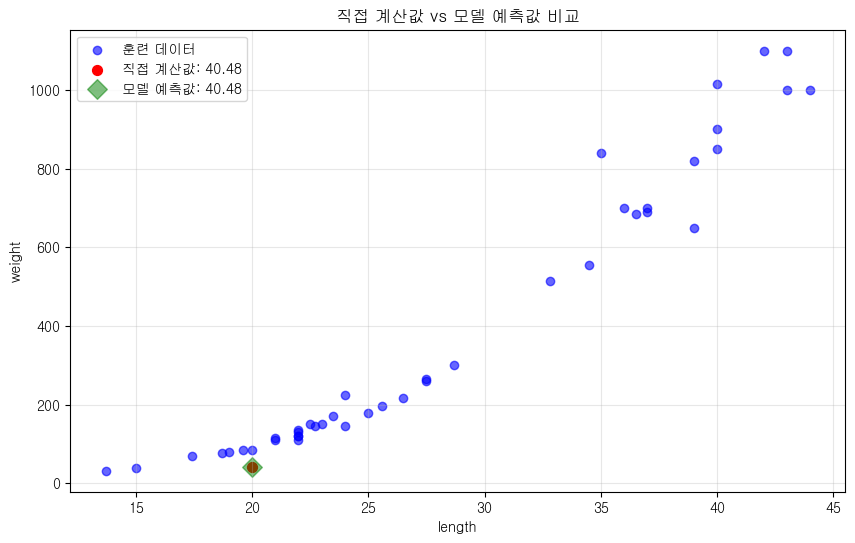

In [86]:
# 직접 계산한 값과 모델 예측값 비교 시각화
manual_prediction = w1*20 + w2*5.08 + w3*2.77 + b
model_prediction = lr.predict([[20.0, 5.08, 2.77]])[0]

print(f"직접 계산한 값: {manual_prediction}")
print(f"모델 예측값: {model_prediction}")
print(f"차이: {abs(manual_prediction - model_prediction)}")

# 시각화
plt.figure(figsize=(10, 6))

# 훈련 데이터 산점도 (3차원 데이터를 2차원으로 시각화)
plt.scatter(train_input[:, 0], train_label, alpha=0.6, label='훈련 데이터', color='blue')

# 직접 계산한 값과 모델 예측값 비교
plt.scatter(20.0, manual_prediction, color='red', marker='o', s=50, label=f'직접 계산값: {manual_prediction:.2f}')
plt.scatter(20.0, model_prediction, color='green', marker='D', s=100, alpha=0.5, label=f'모델 예측값: {model_prediction:.2f}')

plt.xlabel('length')
plt.ylabel('weight')
plt.title('직접 계산값 vs 모델 예측값 비교')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# 직접 계산한 것과 실제 예측 모델이 같은지 확인해보기
# plt scatter로 시각화해서 확인해보기

plt.scatter(test_input[:, 0], test_input[:, 1], c=test_label)
plt.scatter(test_input[:, 0], test_input[:, 1], c=lr.predict(test_input))


### 특성 공학 (Feature Engineering)
- 기계학습 성능 향상을 위해 기존 데이터에서 새로운 특성을 만들거나 기존 특성을 변환하는 전처리
    - 특성 생성
    - 특성 변환
    - 결측치 처리
    - 차원 축소
    - 범주형 데이터 처리 (인코딩)

In [ ]:
# Feature Engineering 은 모델의 성능을 향상시키는 중요한 기술
# 또한, 전처리 과정에서 모델의 성능을 향상시키는 것이 가능하다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=True)
poly.fit([[4, 5]])
poly.transform([[4, 5]])
#include_bias=True 기본값 : 

array([[ 1.,  4.,  5., 16., 20., 25.]])

In [127]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
PolynomialFeatures는 기존 특성을 변환하는 기능을 제공한다.
예를 들어, 기존 특성이 2개인 경우, 이 특성을 조합하여 새로운 특성을 만들 수 있다.

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[1, 4, 5]]) # 2개의 특성을 의미한다.

,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [117]:
poly.transform([[2, 4, 5]])

array([[ 2.,  4.,  5.,  4.,  8., 10., 16., 20., 25.]])

In [118]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=3)
# degree=2 기본값
# 기본값은 2차 항을 만든다.
# 예를 들어, 기존 특성이 2개인 경우, 이 특성을 조합하여 새로운 특성을 만들 수 있다.
poly.fit([[4, 5]])
poly.transform([[4, 5]])

# degree : 하나의 특성에 대해서 몇 차 항을 만들지 결정한다.

array([[  4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [125]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [128]:
# 농어 데이터 특성 추가
poly = PolynomialFeatures(include_bias=False, degree=2)
poly.fit(perch_full)
poly_perch = poly.transform(perch_full)
poly_perch

array([[8.400000e+00, 2.110000e+00, 1.410000e+00, 7.056000e+01,
        1.772400e+01, 1.184400e+01, 4.452100e+00, 2.975100e+00,
        1.988100e+00],
       [1.370000e+01, 3.530000e+00, 2.000000e+00, 1.876900e+02,
        4.836100e+01, 2.740000e+01, 1.246090e+01, 7.060000e+00,
        4.000000e+00],
       [1.500000e+01, 3.820000e+00, 2.430000e+00, 2.250000e+02,
        5.730000e+01, 3.645000e+01, 1.459240e+01, 9.282600e+00,
        5.904900e+00],
       [1.620000e+01, 4.590000e+00, 2.630000e+00, 2.624400e+02,
        7.435800e+01, 4.260600e+01, 2.106810e+01, 1.207170e+01,
        6.916900e+00],
       [1.740000e+01, 4.590000e+00, 2.940000e+00, 3.027600e+02,
        7.986600e+01, 5.115600e+01, 2.106810e+01, 1.349460e+01,
        8.643600e+00],
       [1.800000e+01, 5.220000e+00, 3.320000e+00, 3.240000e+02,
        9.396000e+01, 5.976000e+01, 2.724840e+01, 1.733040e+01,
        1.102240e+01],
       [1.870000e+01, 5.200000e+00, 3.120000e+00, 3.496900e+02,
        9.724000e+01, 5.834400

In [129]:
poly_perch.shape

(56, 9)

In [131]:
# 훈련-테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)

In [ ]:
# 훈련
lr = LinearRegression()
lr.fit(train_input, train_label)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [133]:
# 평가
lr.score(test_input, test_label)

0.9714559911594125

In [134]:
lr.score(train_input, train_label)

0.9903183436982126

##### 특성을 2차부터 5차까지 늘려보기 **<과제>**

In [ ]:

# 함수를 만들고 이를 for문으로 이용해서 특성을 늘려보자.







### 과대적합 & 과소적합

**과대적합 (overfitting)**
- 모델이 훈련 데이터에 지나치게 최적화되어 새로운 데이터에 일반화 되지 않은 상태
- 훈련 데이터에 대한 평가는 좋지만 테스트 데이터에 대한 평가가 떨어지는 상태
- 훈련 데이터의 잡음까지 학습된 상태
- 해결 방법
    - 데이터셋의 복잡도 줄이기
    - 학습할 데이터의 양을 늘이기
    - L1, L2가 적용된 규제 모델 사용하기

**과소적합 (underfitting)**
- 모델 훈련이 덜 된 상태
- 속성을 제대로 분석하지 못한 상태
- 훈련 데이터에 대한 평가조차 좋지 않은 상태
- 해결 방법
    - 학습할 데이터를 추가 제공하기
    - 특성을 추가해 복잡한 패턴을 학습시키기